In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Ridge
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score 
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVR
pd.options.display.max_columns = 110

In [4]:
df_test = pd.read_csv('https://github.com/rashrosha/rihal-challenges/raw/2749ee878db5bd31bc7ef504f42aa43d833d0d1e/data_science/data_test.csv')
df_train = pd.read_csv('https://github.com/rashrosha/rihal-challenges/raw/2749ee878db5bd31bc7ef504f42aa43d833d0d1e/data_science/data_train.csv')

In [5]:

df_train

,manufacturer_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_type,engine_capacity,body_type,has_warranty,ownership,type_of_drive,is_exchangeable,number_of_photos,number_of_maintenance,duration_listed,price_usd
0,Volkswagen,automatic,black,130000,2016,diesel,diesel,1.6,universal,False,owned,front,True,17,38,67,13150.0
1,Renault,manual,brown,149000,2012,gasoline,gasoline,1.6,sedan,False,owned,front,False,9,3,100,7500.0
2,Kia,automatic,brown,110000,2014,gasoline,gasoline,1.6,hatchback,False,owned,front,False,5,10,91,12200.0
3,Opel,automatic,other,255100,2007,gasoline,gasoline,1.8,hatchback,False,owned,front,False,10,4,91,4950.0
4,Mazda,manual,blue,650000,1999,gasoline,gasoline,2.0,sedan,False,owned,front,True,5,7,62,3000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,Opel,manual,white,380000,1996,gasoline,gasoline,1.6,sedan,False,owned,front,False,2,2,59,3500.0
49996,Volkswagen,manual,green,311213,1994,gas,gasoline,1.8,universal,False,owned,front,False,15,7,29,2850.0
49997,Fiat,manual,red,250000,1999,gasoline,gasoline,1.8,coupe,False,owned,front,False,7,13,108,2000.0
49998,BMW,automatic,grey,615000,1998,diesel,diesel,2.5,universal,False,owned,rear,True,10,26,64,5080.0


In [6]:
#to know the number of the missing value  in the training dataset,here we have 15 missing values in engine_capacity
df_train['engine_type']

0          diesel
1        gasoline
2        gasoline
3        gasoline
4        gasoline
           ...   
49995    gasoline
49996    gasoline
49997    gasoline
49998      diesel
49999      diesel
Name: engine_type, Length: 50000, dtype: object

In [7]:
df_train.isnull().sum()

manufacturer_name         0
transmission              0
color                     0
odometer_value            0
year_produced             0
engine_fuel               0
engine_type               0
engine_capacity          15
body_type                 0
has_warranty              0
ownership                 0
type_of_drive             0
is_exchangeable           0
number_of_photos          0
number_of_maintenance     0
duration_listed           0
price_usd                 0
dtype: int64

In [8]:
#we have 5 missing values in engine_capacity in testing dataset
df_test.isnull().sum()

manufacturer_name        0
transmission             0
color                    0
odometer_value           0
year_produced            0
engine_fuel              0
engine_type              0
engine_capacity          5
body_type                0
has_warranty             0
ownership                0
type_of_drive            0
is_exchangeable          0
number_of_photos         0
number_of_maintenance    0
duration_listed          0
price_usd                0
dtype: int64

In [9]:
#to solve the problem of missing value is imputer,we use the known value to calculate the unknown value
#we have multiple chooses for strategy:mean,median,most frequent
#the default for missing values is nan(not a number),sometimes it will be integer like -1 according to the data
#create an object from imputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean',verbose=0)

In [10]:
#to fit the imputer on the data of engine_capacity column
imputer = imputer.fit(df_train[['engine_capacity']])
#to transform the missing values in this column
df_train[['engine_capacity']]=imputer.transform(df_train[['engine_capacity']])

In [11]:
#check for the result
df_train.isnull().sum()

manufacturer_name        0
transmission             0
color                    0
odometer_value           0
year_produced            0
engine_fuel              0
engine_type              0
engine_capacity          0
body_type                0
has_warranty             0
ownership                0
type_of_drive            0
is_exchangeable          0
number_of_photos         0
number_of_maintenance    0
duration_listed          0
price_usd                0
dtype: int64

In [12]:
#to fit the imputer on the data of engine_capacity column in testing data
imputer = imputer.fit(df_test[['engine_capacity']])
#to transform the missing values in this column
df_test[['engine_capacity']]=imputer.transform(df_test[['engine_capacity']])

In [13]:
#check for the result
df_test.isnull().sum()

manufacturer_name        0
transmission             0
color                    0
odometer_value           0
year_produced            0
engine_fuel              0
engine_type              0
engine_capacity          0
body_type                0
has_warranty             0
ownership                0
type_of_drive            0
is_exchangeable          0
number_of_photos         0
number_of_maintenance    0
duration_listed          0
price_usd                0
dtype: int64

In [14]:
#as we know the input to the model should be numbers so we have to do encoding (convert strings to ones and zeros)
#we use label incoder for coulmns that has two categories to be 1 or 0
label_encoder=LabelEncoder()

In [15]:
#we apply it on the columns that have two categories in training dataset
df_train['transmission']= label_encoder.fit_transform(df_train['transmission'])
df_train['has_warranty']= label_encoder.fit_transform(df_train['has_warranty'])
df_train['is_exchangeable']= label_encoder.fit_transform(df_train['is_exchangeable'])
df_train

,manufacturer_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_type,engine_capacity,body_type,has_warranty,ownership,type_of_drive,is_exchangeable,number_of_photos,number_of_maintenance,duration_listed,price_usd
0,Volkswagen,0,black,130000,2016,diesel,diesel,1.6,universal,0,owned,front,1,17,38,67,13150.0
1,Renault,1,brown,149000,2012,gasoline,gasoline,1.6,sedan,0,owned,front,0,9,3,100,7500.0
2,Kia,0,brown,110000,2014,gasoline,gasoline,1.6,hatchback,0,owned,front,0,5,10,91,12200.0
3,Opel,0,other,255100,2007,gasoline,gasoline,1.8,hatchback,0,owned,front,0,10,4,91,4950.0
4,Mazda,1,blue,650000,1999,gasoline,gasoline,2.0,sedan,0,owned,front,1,5,7,62,3000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,Opel,1,white,380000,1996,gasoline,gasoline,1.6,sedan,0,owned,front,0,2,2,59,3500.0
49996,Volkswagen,1,green,311213,1994,gas,gasoline,1.8,universal,0,owned,front,0,15,7,29,2850.0
49997,Fiat,1,red,250000,1999,gasoline,gasoline,1.8,coupe,0,owned,front,0,7,13,108,2000.0
49998,BMW,0,grey,615000,1998,diesel,diesel,2.5,universal,0,owned,rear,1,10,26,64,5080.0


In [16]:
#we apply it on the columns that have two categories in testing dataset
df_test['transmission']= label_encoder.fit_transform(df_test['transmission'])
df_test['has_warranty']= label_encoder.fit_transform(df_test['has_warranty'])
df_test['is_exchangeable']= label_encoder.fit_transform(df_test['is_exchangeable'])
df_test

,manufacturer_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_type,engine_capacity,body_type,has_warranty,ownership,type_of_drive,is_exchangeable,number_of_photos,number_of_maintenance,duration_listed,price_usd
0,BMW,0,white,115000,2012,gasoline,gasoline,4.4,sedan,0,owned,all,1,32,104,146,20450.0
1,Mercedes-Benz,1,other,500000,1999,diesel,diesel,2.2,sedan,0,owned,rear,0,7,9,147,2600.0
2,Fiat,1,silver,210000,2002,gasoline,gasoline,1.2,hatchback,0,owned,front,1,16,7,27,2900.0
3,Mitsubishi,0,violet,294000,2000,diesel,diesel,3.2,suv,0,owned,all,1,10,2,48,7500.0
4,Opel,0,blue,244000,1998,gasoline,gasoline,1.6,sedan,0,owned,front,0,9,10,116,2200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26995,Volkswagen,1,violet,92000,1993,gasoline,gasoline,2.0,hatchback,0,owned,front,0,13,11,65,3333.0
26996,Infiniti,0,silver,135185,2009,gas,gasoline,3.5,sedan,0,owned,all,0,8,2,85,8500.0
26997,Volkswagen,1,white,450000,1993,gasoline,gasoline,1.8,sedan,0,owned,front,0,6,1,35,1100.0
26998,Audi,1,grey,275000,2006,gasoline,gasoline,2.0,sedan,0,owned,front,0,7,28,115,6300.0


In [17]:
# for the columns which has more than two categories we use OneHotEncoder 
#we create an object from OneHotEncoder
encoder=OneHotEncoder(sparse=False)
#we apply it on the columns that have more than two categories in training dataset
df_train['manufacturer_name']=encoder.fit_transform(df_train[['manufacturer_name']])
df_train['engine_fuel']= encoder.fit_transform(df_train[['engine_fuel']])
df_train['color']=encoder.fit_transform(df_train[['color']])
df_train['ownership']= encoder.fit_transform(df_train[['ownership']])
df_train['engine_type']= encoder.fit_transform(df_train[['engine_type']])
df_train['body_type']=encoder.fit_transform(df_train[['body_type']])
df_train['type_of_drive']=encoder.fit_transform(df_train[['type_of_drive']])
df_train

,manufacturer_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_type,engine_capacity,body_type,has_warranty,ownership,type_of_drive,is_exchangeable,number_of_photos,number_of_maintenance,duration_listed,price_usd
0,0.0,0,1.0,130000,2016,1.0,1.0,1.6,0.0,0,0.0,0.0,1,17,38,67,13150.0
1,0.0,1,0.0,149000,2012,0.0,0.0,1.6,0.0,0,0.0,0.0,0,9,3,100,7500.0
2,0.0,0,0.0,110000,2014,0.0,0.0,1.6,0.0,0,0.0,0.0,0,5,10,91,12200.0
3,0.0,0,0.0,255100,2007,0.0,0.0,1.8,0.0,0,0.0,0.0,0,10,4,91,4950.0
4,0.0,1,0.0,650000,1999,0.0,0.0,2.0,0.0,0,0.0,0.0,1,5,7,62,3000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.0,1,0.0,380000,1996,0.0,0.0,1.6,0.0,0,0.0,0.0,0,2,2,59,3500.0
49996,0.0,1,0.0,311213,1994,0.0,0.0,1.8,0.0,0,0.0,0.0,0,15,7,29,2850.0
49997,0.0,1,0.0,250000,1999,0.0,0.0,1.8,0.0,0,0.0,0.0,0,7,13,108,2000.0
49998,0.0,0,0.0,615000,1998,1.0,1.0,2.5,0.0,0,0.0,0.0,1,10,26,64,5080.0


In [18]:
#we apply it on the columns that have more than two categories in testing dataset
df_test['manufacturer_name']=encoder.fit_transform(df_test[['manufacturer_name']])
df_test['engine_fuel']= encoder.fit_transform(df_test[['engine_fuel']])
df_test['engine_type']= encoder.fit_transform(df_test[['engine_type']])
df_test['color']=encoder.fit_transform(df_test[['color']])
df_test['ownership']= encoder.fit_transform(df_test[['ownership']])
df_test['body_type']=encoder.fit_transform(df_test[['body_type']])
df_test['type_of_drive']=encoder.fit_transform(df_test[['type_of_drive']])
df_test

,manufacturer_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_type,engine_capacity,body_type,has_warranty,ownership,type_of_drive,is_exchangeable,number_of_photos,number_of_maintenance,duration_listed,price_usd
0,0.0,0,0.0,115000,2012,0.0,0.0,4.4,0.0,0,0.0,1.0,1,32,104,146,20450.0
1,0.0,1,0.0,500000,1999,1.0,1.0,2.2,0.0,0,0.0,0.0,0,7,9,147,2600.0
2,0.0,1,0.0,210000,2002,0.0,0.0,1.2,0.0,0,0.0,0.0,1,16,7,27,2900.0
3,0.0,0,0.0,294000,2000,1.0,1.0,3.2,0.0,0,0.0,1.0,1,10,2,48,7500.0
4,0.0,0,0.0,244000,1998,0.0,0.0,1.6,0.0,0,0.0,0.0,0,9,10,116,2200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26995,0.0,1,0.0,92000,1993,0.0,0.0,2.0,0.0,0,0.0,0.0,0,13,11,65,3333.0
26996,0.0,0,0.0,135185,2009,0.0,0.0,3.5,0.0,0,0.0,1.0,0,8,2,85,8500.0
26997,0.0,1,0.0,450000,1993,0.0,0.0,1.8,0.0,0,0.0,0.0,0,6,1,35,1100.0
26998,0.0,1,0.0,275000,2006,0.0,0.0,2.0,0.0,0,0.0,0.0,0,7,28,115,6300.0


In [19]:
#define the input and output for training dataset
x_train=df_train.loc[:,df_train.columns!='price_usd']
y_train=df_train['price_usd']
#define the input and output for training dataset
x_test=df_test.loc[:,df_test.columns!='price_usd']
y_test=df_test['price_usd']

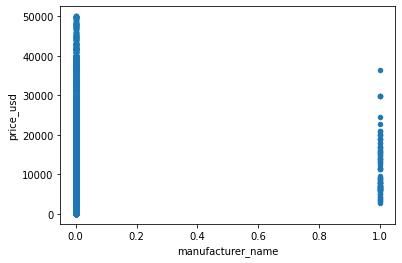

In [20]:
#to know the relation between each feature and the price of the car we visualize the data
#this figure show us the relation between manufacturer_name and price_usd
#as we show this is an intermediate feature 
df_train.plot( 'manufacturer_name', 'price_usd' ,kind='scatter')

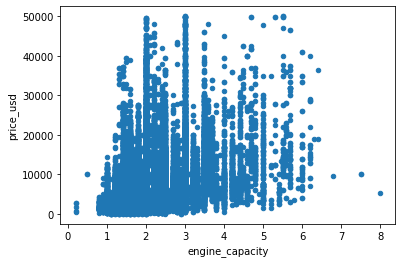

In [21]:
df_train.plot( 'engine_capacity', 'price_usd' ,kind='scatter')
#as we show this is a good feature

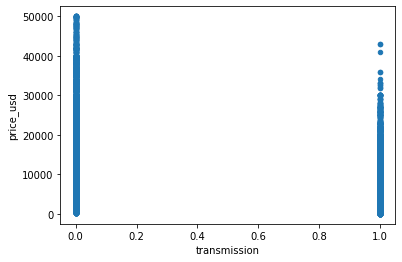

In [ ]:
df_train.plot( 'transmission', 'price_usd' ,kind='scatter')
# as we show this feature is not good enough

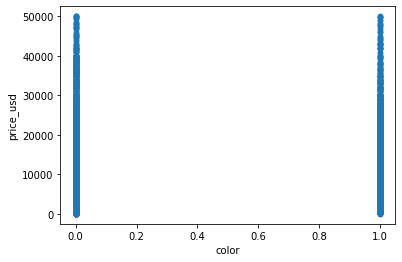

In [ ]:
df_train.plot( 'color', 'price_usd' ,kind='scatter')
#as we show it is a weak feature

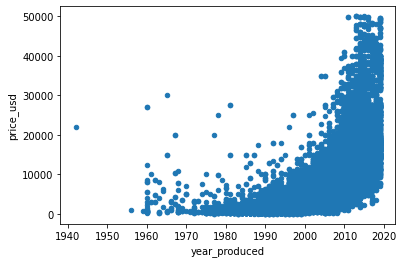

In [ ]:
df_train.plot( 'year_produced', 'price_usd' ,kind='scatter')
# as we show it's a good feature

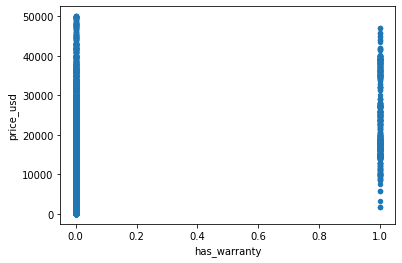

In [ ]:
df_train.plot( 'has_warranty', 'price_usd' ,kind='scatter')
#it isn't good enough 

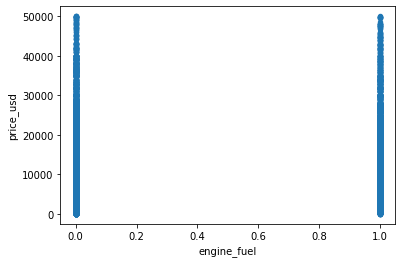

In [ ]:
df_train.plot( 'engine_fuel', 'price_usd' ,kind='scatter')
#also it's a weak feature

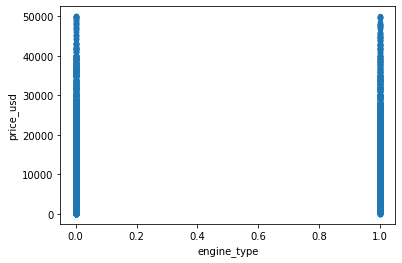

In [ ]:
df_train.plot( 'engine_type', 'price_usd' ,kind='scatter')
#also it's a weak feature

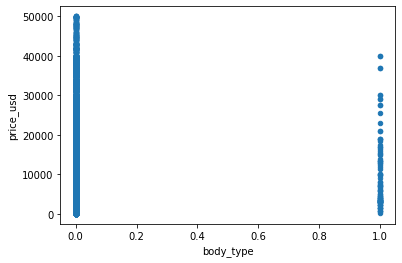

In [ ]:
df_train.plot( 'body_type', 'price_usd' ,kind='scatter')
# it's intermediate 

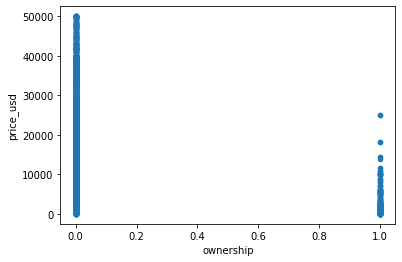

In [ ]:
df_train.plot( 'ownership', 'price_usd' ,kind='scatter')
#it's intermediate

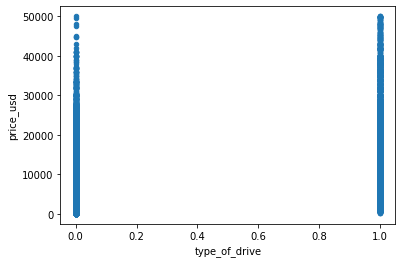

In [ ]:
df_train.plot( 'type_of_drive', 'price_usd' ,kind='scatter')
#it's a weak feature

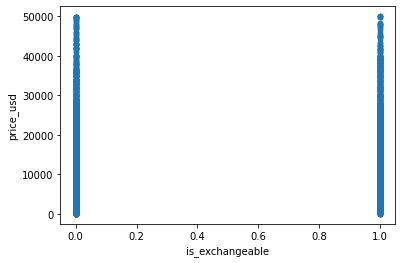

In [ ]:
df_train.plot( 'is_exchangeable', 'price_usd' ,kind='scatter')
#it's a weak feature

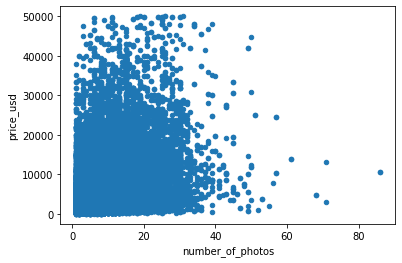

In [ ]:
df_train.plot( 'number_of_photos', 'price_usd' ,kind='scatter')
#it's good feature

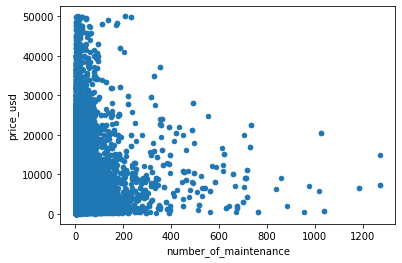

In [ ]:
df_train.plot( 'number_of_maintenance', 'price_usd' ,kind='scatter')
#it's a good feature

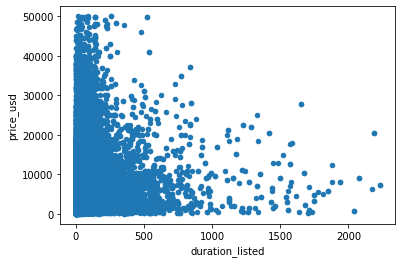

In [ ]:
df_train.plot( 'duration_listed', 'price_usd' ,kind='scatter')
#it's a good feature

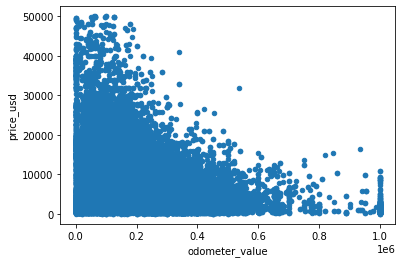

In [ ]:
df_train.plot( 'odometer_value', 'price_usd' ,kind='scatter')
#it's a good feature

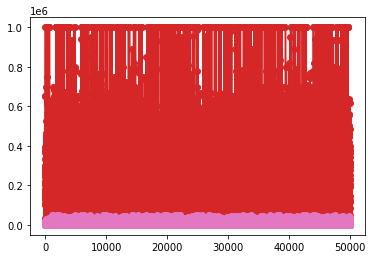

In [ ]:
plt.plot(x_train, '-o', y_train, '-o')

{'boxes': [<matplotlib.lines.Line2D at 0x7f97e6756890>,
  ...],
 'caps': [<matplotlib.lines.Line2D at 0x7f97e69e1990>,
  ...],
 'fliers': [<matplotlib.lines.Line2D at 0x7f97e69e89d0>,
  ...],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f97e69e8490>,
  ...],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f97e6ed8f90>,
  ...]}

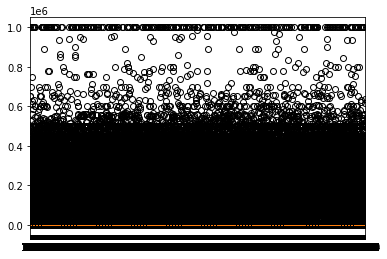

In [ ]:
plt.boxplot(x_train)

<BarContainer object of 50000 artists>

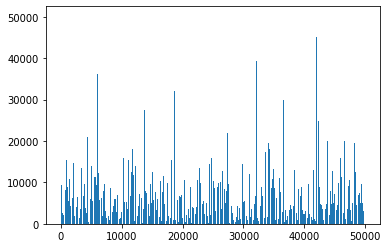

In [ ]:
plt.bar(range(len(x_train)),y_train)


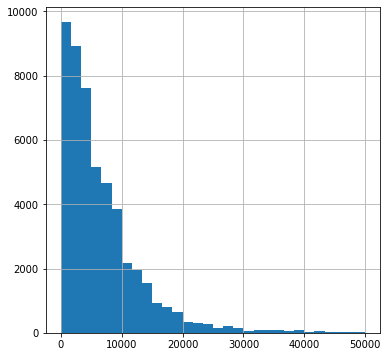

In [ ]:
#The histogram of the price_usd(The out put)
df_train['price_usd'].hist(bins=30,figsize=(6,6))
plt.show()

In [22]:
#apply the Ridge Alghorithm on the processing dataset(training and testing)
#the result was as below: MAE: 2382.2383101795485,R_squared score (training):0.669 ,R_squared score (test):0.674
#as we show the result is not good enough but we don't have overfitting
linridge=Ridge(alpha=20).fit(x_train,y_train)#create regressor object with alpha=20 and fit it on the training data
y_pred=linridge.predict(x_test)  # test the output
print("MAE:", mean_absolute_error(y_test, y_pred)) #calculate the mean_absolute_error
print('Ridge regression linear model coeff (w):\n{}'.format (linridge.coef_)) #calculate the coefficient 
print('Ridge regression linear model intetrcept (b):{}'.format (linridge.intercept_)) #calculate the interception
print('R_squared score (training):{:.3f}'.format(linridge.score(x_train,y_train))) #calculte the R_squared score (training)
print('R_squared score (test):\n{:.3f}'.format(linridge.score(x_test,y_test))) #calculte the R_squared score (testing)

MAE: 2383.2786525538777
Ridge regression linear model coeff (w):
[ 3.56532611e+02 -1.23355385e+03  3.82550831e+02 -5.98077736e-03
  4.08786646e+02  4.77979963e+02  9.79773727e+02  1.69170826e+03
  3.31164614e+03  8.58351439e+03 -1.09841920e+03  3.14448178e+03
 -2.27015414e+02  1.00191977e+02  7.19662759e-01  1.66402322e+00]
Ridge regression linear model intetrcept (b):-815420.531195468
R_squared score (training):0.669
R_squared score (test):
0.674


In [ ]:
#apply the SVR Alghorithm on the processing dataset(training and testing)
#the result was as below:R-squared (training): 0.8607903143086737,R-squared(testing): 0.8531279810390635, 0.22841849713548348
#the result is good and we haven't overfitting(comparing between training score and testing score)
#Feature Scaling
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(x_train)
X_test = sc_X.fit_transform(x_test)
y = sc_y.fit_transform(y_train.values.reshape(-1, 1))
y_test = sc_y.fit_transform(y_test.values.reshape(-1, 1))

regressor = SVR(kernel='rbf')# Create  support vector regressor,the kernel is radial basis function kernel (after many experiments it give the best result)
regressor.fit(X,y) # Fitting the Support Vector Regression Model to the dataset
y_pred = regressor.predict(X_test) # test the output
score = regressor.score(X,y) #calculte the R_squared score (training)
score1 = regressor.score(X_test,y_test)  #calculte the R_squared score (testing)
print("R-squared(training):", score)  
print("R-squared(testing):", score1)  
print("MAE:", mean_absolute_error(y_test, y_pred))  #calculate the mean_absolute_error

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R-squared(training): 0.8607903143086737
R-squared(testing): 0.8531279810390635
MAE: 0.22841849713548348


In [23]:
# Fitting Random Forest Regression on the preprocessing dataset(training and testing)
#the result was as below: R-squared (training): 0.9905267166835499,R-squared(testing): 0.9403625055644906  ,MAE: 855.572779851486
#the accuracy is good but the mean_absolute_error is large
#import the regressor

 
#create regressor object
regressorForest = RandomForestRegressor(n_estimators = 100, random_state = 0)
 
#fit the regressor with training data
regressorForest.fit(x_train, y_train) 
Y1_pred = regressorForest.predict(x_test)  # test the output
score2 = regressorForest.score(x_train,y_train) #calculte the R_squared score (training)
score3 = regressorForest.score(x_test,y_test) #calculte the R_squared score (testing)
print("R-squared(training):", score2)
print("R-squared(testing):", score3)
print("MAE:", mean_absolute_error(y_test, Y1_pred)) #calculate the mean_absolute_error

R-squared(training): 0.9906512481583342
R-squared(testing): 0.9415293207081287
MAE: 851.158093506763


In [24]:
#apply the polynomial regression Alghorithm on the preprocessing dataset(training and testing)
#the result was as below:R-squared: 0.7673290176225483,MAE: 2007.2998815537233
# the MAE is too big 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

lin = LinearRegression()  #create regressor object
 
lin.fit(x_train,y_train)  #fit the regressor with training data
poly = PolynomialFeatures(degree = 4)

X_poly = poly.fit_transform(x_train) 
poly.fit(X_poly, y_train) # Fitting Polynomial Regression to the dataset

X_poly_test = poly.fit_transform(x_test)
lin2 = LinearRegression()
lin2.fit(X_poly, y_train)
Y_pred = lin2.predict(X_poly_test)  # test the output 
scoreL = lin2.score(X_poly,y_train)
score_test = lin2.score(X_poly_test,y_test)
print("R-squared(training):", scoreL)
print("R-squared(training):", score_test)
print("MAE:", mean_absolute_error(y_test, Y_pred))

R-squared(training): 0.7673290176225483
R-squared(training): 0.6027721645181783
MAE: 2007.2998815537233


In [27]:
#apply DecisionTreeRegression Alghorithm on the preprocessing dataset(training and testing)
#the result was as below:R-squared(training): 0.9991781181456588,R-squared(testing) : 0.9096009938577675 ,MAE:  691.648458370899
#the MAE is too big 

regressor_t = DecisionTreeRegressor() #create regressor object
regressor_t.fit(x_train, y_train) #fit the regressor with training data
y_pred_t = regressor_t.predict(x_test)  # test the output 
score_t = regressor_t.score(x_train,y_train)   #calculte the R_squared score (training)
score_test1 = regressor_t.score(x_test,y_test)  #calculte the R_squared score (testing)
print("R-squared (training):", score_t)
print("R-squared(testing) :", score_test1) 
print("MAE:", mean_absolute_error(y_test, y_pred_t)) #calculate the mean_absolute_error

R-squared (training): 0.9991781181456588
R-squared(testing) : 0.9096009938577675
MAE: 699.3292383708991


In [30]:
#we get the important features (we show them above with figures but we get them by DecisionTree Alghorithm)
regressor_t.feature_importances_

array([4.80676908e-05, 9.79752252e-03, 3.57265774e-03, 4.44604010e-02,
       6.22419720e-01, 6.56828072e-03, 5.33224845e-03, 2.09435714e-01,
       1.04481153e-03, 2.38239656e-04, 1.34006782e-03, 2.00415173e-02,
       3.56383001e-03, 2.49988222e-02, 1.89009389e-02, 2.82371607e-02])

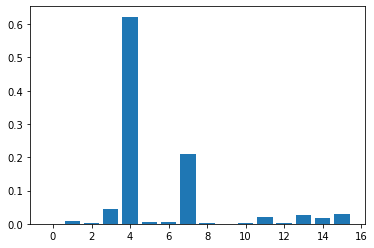

In [32]:
# represent the feature_importances by bar through the figure we notice the importance of each feature
num=len(x_train.columns)
plt.bar(range(num),regressor_t.feature_importances_,align='center')
plt.show()

In [33]:
#detrmine the important features in both training and testing dataset
important_features=df_train[['odometer_value','year_produced','transmission','manufacturer_name','body_type','engine_capacity','ownership','number_of_photos','number_of_maintenance','duration_listed']]
important_features_test=df_test[['odometer_value','year_produced','transmission','manufacturer_name','body_type','engine_capacity','ownership','number_of_photos','number_of_maintenance','duration_listed']]

In [34]:
#apply the Ridge Alghorithm on the important features in both training and testing dataset
#the result was as below: MAE:2534.8609548331365 ,R_squared score (training):0.618
#R_squared score (test):0.615
linridge=Ridge(alpha=20).fit(important_features,y_train)
y_pred=linridge.predict(important_features_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print('Ridge regression linear model coeff (w):\n{}'.format (linridge.coef_))
print('Ridge regression linear model intetrcept (b):{}'.format (linridge.intercept_))
print('R_squared score (training):{:.3f}'.format(linridge.score(important_features,y_train)))
print('R_squared score (test):\n{:.3f}'.format(linridge.score(important_features_test,y_test)))

MAE: 2534.8609548331365
Ridge regression linear model coeff (w):
[-6.02582105e-03  4.63161861e+02 -1.24365766e+03  7.20823681e+01
  2.68189239e+03  2.46390273e+03 -1.06928255e+03  1.11209874e+02
  9.59522457e-01  1.23058482e+00]
Ridge regression linear model intetrcept (b):-924955.9321482552
R_squared score (training):0.618
R_squared score (test):
0.615


In [37]:
#apply the SVR Alghorithm on the important features in both training and testing dataset
#the result was as below:R-squared (training): 0.8310304079174997  ,R-squared (testing): 0.8229072393474446, MAE: 0.8476458656748581
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(important_features)

y = sc_y.fit_transform(y_train.values.reshape(-1, 1))
X_test = sc_X.fit_transform(important_features_test)
y_test = sc_y.fit_transform(y_test.values.reshape(-1,1))
regressor = SVR(kernel='rbf')
regressor.fit(X,y)
y_pred = regressor.predict(important_features_test)
score = regressor.score(X,y)
score_test = regressor.score(X_test,y_test)
print("R-squared (training):", score)
print("R-squared (testing):", score_test)
print("MAE:", mean_absolute_error(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVR was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


R-squared (training): 0.8310304079174997
R-squared (testing): 0.8229072393474446
MAE: 0.8476458656748581


In [ ]:
#I try on the other Alghorithm but the results are worst than before selecting the important features only
#according to the experiments the best model was SVR it give us best accuracy without overfitting, and with minimum MAE